[841, 843]
       txn_date  new_case  total_case  new_case_excludeabroad  \
841  2022-05-02      9331     4271815                    9273   
842  2022-05-03      9721     4281536                    9670   
843  2022-05-04      9288     4290824                    9268   

     total_case_excludeabroad  new_death  total_death  new_recovered  \
841                   4246989         84        28701          21168   
842                   4256659         77        28778          20145   
843                   4265927         82        28860          19119   

     total_recovered          update_date  
841          4114046  2022-05-02 07:35:52  
842          4134191  2022-05-03 08:13:25  
843          4153310  2022-05-04 07:35:09  
total_case_excludeabroad
2022-05-02 2022-05-04
[113, 843]
       txn_date  new_case  total_case  new_case_excludeabroad  \
113  2020-05-04        18        2987                      18   
114  2020-05-05         1        2988                       1   
115  2020-

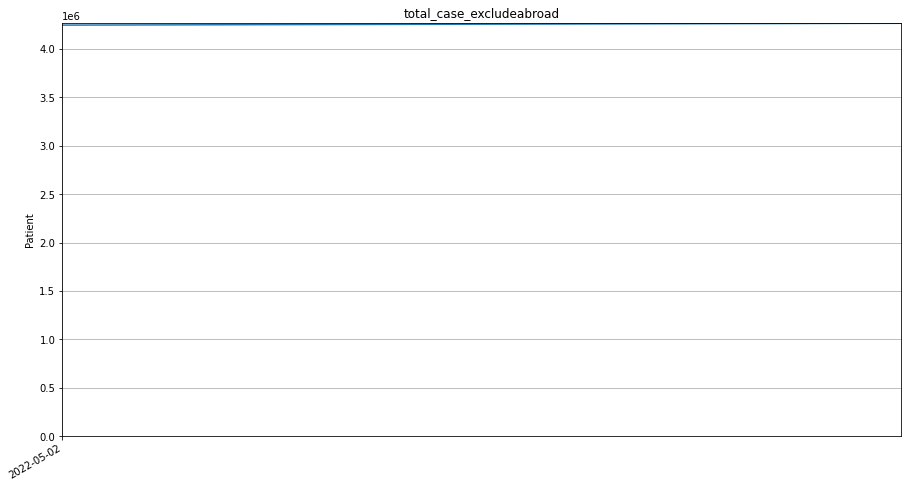

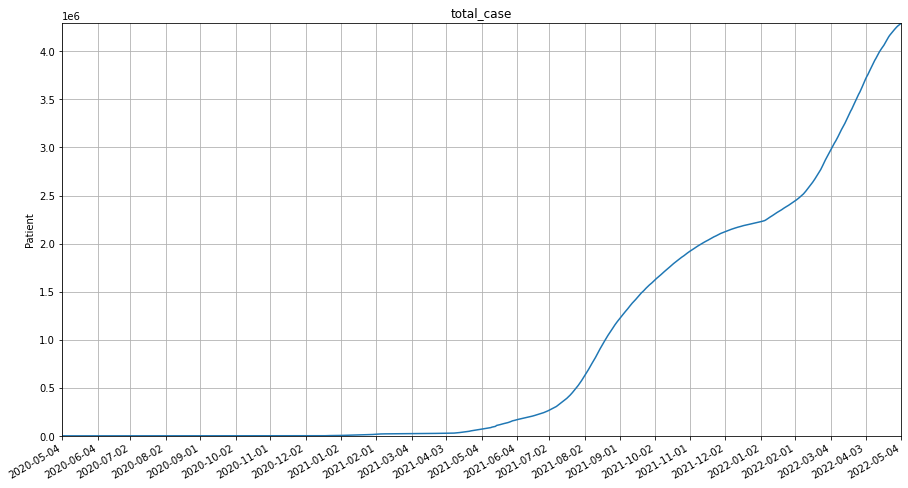

In [ ]:
from tkinter import *
from tkcalendar import DateEntry
import tkinter.font as font
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from datetime import datetime, date ,timedelta
from pandas import DataFrame
import requests

def open_single_data(): #สร้างฟังก์ชันเลือกข้อมูลแบบวันเดียว
    def getdate(data):   #ฟังก์ชันรับข้อมูล data เข้ามา
        dt = cal.get_date() #นำข้อมูลวันที่ที่เลือกมาเก็บลงใน dt
        dt_show = dt.strftime("%d %B, %Y")   #นำข้อมูล dt แปลงเป็น วัน,เดือน,ปี แล้วเก็บลงใน dt_show
        datelabel.config(text=dt_show,font=("TH-SarabunPSK",15,'bold'),bg='#F7ECDE') #แสดงวันที่บน frame
        date_find = str(dt)
        try:
            N = date_str.index(date_find) #ข้อมูลวันที่มาแปลงเป็น string 
        except ValueError: #ถ้า error กำหนดให้ label ข้อมูลเป็น string ว่าง
            new_caselabel.config(text='')
            total_caselabel.config(text='')
            new_case_excludeabroadlabel.config(text='')
            total_case_excludeabroadlabel.config(text='')
            new_deathlabel.config(text='')
            total_deathlabel.config(text='')
            new_recoveredlabel.config(text='')
            total_recoveredlabel.config(text='')

        # ฟังก์ชันเอาข้อมูลแต่ละตัวจาก data
        getnew_case = lambda data, N: data[N]['new_case']
        gettotal_case = lambda data, N: data[N]['total_case']
        getnew_case_excludeabroad = lambda data, N: data[N]['new_case_excludeabroad']
        gettotal_case_excludeabroad = lambda data, N: data[N]['total_case_excludeabroad']
        getnew_death = lambda data, N: data[N]['new_death']
        gettotal_death = lambda data, N: data[N]['total_death']
        getnew_recovered = lambda data, N: data[N]['new_recovered']
        gettotal_recovered = lambda data, N: data[N]['total_recovered']
        
        #หาข้อมูลแต่ละตัว
        new_case = getnew_case(data, N)
        total_case = gettotal_case(data, N)
        new_case_excludeabroad = getnew_case_excludeabroad(data, N)
        total_case_excludeabroad = gettotal_case_excludeabroad(data, N)
        new_death = getnew_death(data, N)
        total_death = gettotal_death(data, N)
        new_recovered = getnew_recovered(data, N)
        total_recovered = gettotal_recovered(data, N)
        
        # ลงข้อมูลแต่ละตัวใน Label
        new_caselabel.config(text=str(new_case)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#FF7878",fg="white")
        total_caselabel.config(text=str(total_case)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#FFB347",fg="white")
        new_case_excludeabroadlabel.config(text=str(new_case_excludeabroad)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#FF7171",fg="white")
        total_case_excludeabroadlabel.config(text=str(total_case_excludeabroad)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#FFA82E",fg="white")
        new_recoveredlabel.config(text=str(new_recovered)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#77DD77",fg="white")
        total_recoveredlabel.config(text=str(total_recovered)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#4ed34e",fg="white")
        new_deathlabel.config(text=str(new_death)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#808080",fg="white")
        total_deathlabel.config(text=str(total_death)+" ราย",width=16,font=("TH-SarabunPSK",28,'bold'),bg="#696969",fg="white")
        
        #กำหนดสีและขนาดของตัวอักษรและพื้นหลัง
        Label(root,text="ผู้ติดเชื้อรายใหม่",width=32,height=2,font=("TH-SarabunPSK",15),bg="#FF7878",fg="white").place(y=140)
        Label(root,text="ผู้ติดเชื้อสะสม",width=32,height=2,font=("TH-SarabunPSK",15),bg="#FFB347",fg="white").place(y=228)
        Label(root,text="ผู้ติดเชื้อรายใหม่(ไม่นับที่มาจากต่างประเทศ)",width=32,height=2,font=("TH-SarabunPSK",15),bg="#FF7171",fg="white").place(x=352,y=140)
        Label(root,text="ผู้ติดเชื้อรายสะสม(ไม่นับที่มาจากต่างประเทศ)",width=32,height=2,font=("TH-SarabunPSK",15),bg="#FFA82E",fg="white").place(x=352,y=228)
        Label(root,text="ผู้ติดเชื้อรักษาหายรายใหม่",width=32,height=2,font=("TH-SarabunPSK",15),bg="#77DD77",fg="white").place(y=316)
        Label(root,text="ผู้ติดเชื้อรักษาหายสะสม",width=32,height=2,font=("TH-SarabunPSK",15),bg="#4ed34e",fg="white").place(x=352,y=316)
        Label(root,text="ผู้เสียชีวิตจากการติดเชื้อรายใหม่",width=32,height=2,font=("TH-SarabunPSK",15),bg="#808080",fg="white").place(y=404)
        Label(root,text="ผู้เสียชีวิตจากการติดเชื้อสะสม",width=32,height=2,font=("TH-SarabunPSK",15),bg="#696969",fg="white").place(x=352,y=404)
        
    #ดึงข้อมูล API จากในเว็ปมาเก็บไว้ในตัวแปร data
    response_1 = requests.get("https://covid19.ddc.moph.go.th/api/Cases/round-1to2-all")
    response_2 = requests.get("https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-all") 
    data = eval(response_1.text) + eval(response_2.text)
    date_str = [i['txn_date'] for i in data] #ลูปเอาวันที่ในข้อมูล data มาเก็บไว้ในตัวแปร date_str
    
    
    root = Tk() #สร้าง frame ขึ้นมา
    root.geometry("700x496+450+100") #กำหนดขนาด frame
    root.title("Covid-19 Information in Thailand") #กำหนดชื่อแอพ
    root.configure(bg='#F7ECDE') #กำหนดสีพื้นหลังframeทั้งหมด
    root.resizable(0,0) #ไม่ให้ผู้ใช้ปรับขนาดหน้าต่างได้
    

    title1 = Label(root,text="เลือกวันที่ต้องการดูข้อมูล",font=("TH-SarabunPSK",20,'bold'),bg='#F7ECDE') #กำหนดข้อความ Label บน frame 
    cal = DateEntry(root,maxdate=date.today()-timedelta(days=1), mindate=date(2020, 1, 12),bg='#F7ECDE') #สร้างปฏิทินขึ้นมาให้ผู้ใช้เลือกวันที่
    cal['font'] = font.Font(size=12) #ปรับขนาดตัวอักษร
    button = Button(root, text="ยืนยัน",width=6,command=lambda: getdate(data),bg="#6495ED",fg="white") #สร้างปุ่มกดยืนยัน
    button['font'] = font.Font(size=11) #ปรับขนาดตัวอักษร
    homebtn = Button(root,text="หน้าแรก",command=lambda: [root.destroy(),create_main_window()]) #สร้างปุ่มกดกลับไปหน้าแรก
    homebtn['font'] = font.Font(size=10) #ปรับขนาดตัวอักษร
    
    #สร้าง Label ไว้บน frame เอาไว้ก่อนเพื่อจะได้กำหนดขนาดและแก้ไขได้
    datelabel = Label(root)
    datelabel.place(x=300,y=100) 
    new_caselabel = Label(root)
    new_caselabel.place(y=182)
    total_caselabel = Label(root)
    total_caselabel.place(y=270)
    new_case_excludeabroadlabel = Label(root)
    new_case_excludeabroadlabel.place(x=352,y=182)
    total_case_excludeabroadlabel = Label(root)
    total_case_excludeabroadlabel.place(x=352,y=270)
    new_deathlabel = Label(root)
    new_deathlabel.place(y=446)
    total_deathlabel = Label(root)
    total_deathlabel.place(x=352,y=446)
    new_recoveredlabel = Label(root)
    new_recoveredlabel.place(y=358)
    total_recoveredlabel = Label(root)
    total_recoveredlabel.place(x=352,y=358)

    #กำหนดที่อยู่ของปุ่ม,ปฏิทิน,หัวข้อบน frame
    homebtn.place(x=640,y=10)
    button.place(x=410,y=58)
    cal.place(x=270,y=62)
    title1.place(x=230,y=15)
    root.mainloop()

def open_multi_data(): #สร้างฟังก์ชันเลือกข้อมูลแบบเป็นช่วง
    #ฟังชันก์วาดกราฟ
    def draw_graph(dataOption_th, start: date, end: date):
        #กำหนดค่าerror_label ให้ว่าง
        error_label.config(text='')
        
        #กำหนดตัวเเปรที่ใช้ในการระบุช่วง
        slicer = [-1, -1]

        #ลบกราฟเดิมที่แสดงอยู่(ถ้ามี)
        for il in graphWidget:
            il.destroy()

        #ถ้าวันเริ่มต้นมีค่ามากกว่าวันสิ้นสุดให้เเสดงข้อความ
        if start > end:
            error_label.config(text="กรุณาเลือกวันที่ให้ถูกต้อง",font=(20),fg = "red",bg="white")
            return
        
        #วนลูปสำหรับทุกแถวในชุดข้อมูล
        for i, row in df.iterrows():
            #หาข้อมูลแรกที่วันมากกว่าหรือเท่ากับวันเริ่มต้น แล้วเก็บ index ไว้ใน slicer[0]
            if datetime.strptime(row['txn_date'], "%Y-%m-%d").date() >= start:
                if slicer[0] < 0:
                    slicer[0] = i

            #หาข้อมูลเเรกที่มากกว่าหรือเท่ากับวันสิ้นสุด หากเจอให้เก็บค่า index ใน slicer[1] แล้ว ออกจากลูป 
            if datetime.strptime(row['txn_date'], "%Y-%m-%d").date() >= end:
                slicer[1] = i
                break
        
        print(slicer)
        #สร้าง dataframe ใหม่ โดยตัดเอาเฉพาะช่วงที่ต้องการ 
        sliced_df = df[slicer[0]:slicer[1] + 1]
        print(sliced_df)

        #รับค่าชุดของข้อมูลที่เป็นภาษาไทย มาเเปลงเป็นภาษาอังกฤษ จากการเทียบ index
        dataOption = dataOptions[dataOptions_th.index(dataOption_th)]
        print(dataOption)

        #สร้าง subplot
        fig, ax = plt.subplots(constrained_layout=True)
        ax.plot('txn_date', dataOption, data=sliced_df)

        #ให้ locator ของเเกน x แสดงค่าเป็นเดือน
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        #เปิดการใช้งาน grid
        ax.grid(True)
        #กำหนด label ให้เเกน y
        ax.set_ylabel(r'Patient')
        #กำหนด title ให้กราฟ
        ax.set_title(dataOption)

        #หมุน label ของเดือนในแกน x 30 องศา
        for label in ax.get_xticklabels(which='major'):
            label.set(rotation=30, horizontalalignment='right')
        
        #กำหนดลิมิตของขนาดกราฟ
        plt.ylim([0, sliced_df[dataOption].max() + 5000])
        plt.xlim([0, len(sliced_df)-1])
        plt.plot()

        #นำกราฟมาใส่ใน FigureCanvasTkAgg เพื่อนำแสดงใน tkinter
        bar_1 = FigureCanvasTkAgg(fig,root).get_tk_widget()
        bar_1.pack(fill='both',expand='true',pady=135)
        
        #เก็บ widget ของกราฟไว้ใน graphWidget เพื่อให้สามารถทำลายได้
        graphWidget.append(bar_1)
        print(start, end)

    #ดึงข้อมูล API จากเว็ปมาเก็บไว้ใน df โดยใช้ DataFrame
    response_1 = requests.get("https://covid19.ddc.moph.go.th/api/Cases/round-1to2-all")
    response_2 = requests.get("https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-all")
    df = DataFrame(response_1.json() + response_2.json())

    graphWidget = [] #สร้างลิสต์เปล่า
    root = Tk() #สร้างหน้าต่าง Frame ขึ้นมา
    root.resizable(0,0) #กำหนดให้ผู้ใช้ไม่สามารถขยายขนาดหน้าต่างได้
    root.geometry("900x750+300+25") #กำหนดขนาดหน้าต่าง
    root.title("Covid-19 Information in Thailand") #กำหนดชื่อ title แอพ
    root.configure(bg="#FFFFFF") #กำหนดสีพื้นหลัง
    
    #กำหนดค่าเริ่มต้น ของอินพุุต
    value_inside = StringVar(root)
    value_inside.set(dataOptions_th[0])
    startDateStringVar = StringVar(root)
    endDateStringVar = StringVar(root)

    #dateEntry
    start_dateEntry = DateEntry(root,maxdate=date.today()- timedelta(days=1), mindate=date(2020, 1, 12),textvariable=startDateStringVar)
    start_dateEntry['font'] = font.Font(size=10)
    end_dateEntry = DateEntry(root, maxdate=date.today()- timedelta(days=1), mindate=date(2020, 1, 12), textvariable=endDateStringVar)
    end_dateEntry['font'] = font.Font(size=10)
    
    #DropdownOptions
    boxOption = OptionMenu(root, value_inside, *dataOptions_th)
    boxOption['font'] = font.Font(size=10)
  
    #ปุ่มยืนยัน
    confrimBTN = Button(root, text="ตกลง",width=7,bg="#6495ED",fg="white", command=lambda: draw_graph(value_inside.get(),
                                                                      start_dateEntry.get_date(),
                                                                      end_dateEntry.get_date()))
    confrimBTN['font'] = font.Font(size=10)
    #ปุ่มหน้าหลัก
    homebtn = Button(root,text="หน้าแรก",command=lambda: [root.destroy(),create_main_window()])
    homebtn['font'] = font.Font(size=10)
    
    #Lable
    Label(root,text="วันที่เริ่มต้น : ",font=(15),bg="#FFFFFF").place(x=245,y=15)
    Label(root,text="วันที่สิ้นสุด : ",font=(15),bg="#FFFFFF").place(x=468,y=15)
    Label(root,text="กรุณาเลือกข้อมูลที่ต้องการ : ",font=(15),bg="#FFFFFF").place(x=285,y=56)
    error_label = Label(root)
    #กำหนดวันเริ่มต้น
    start_dateEntry.set_date('1/12/20')

    #จัดวาง widget
    error_label.place(x=660,y=95)
    homebtn.place(x=820,y=10)
    start_dateEntry.place(x=352,y=20)
    end_dateEntry.place(x=572,y=20)
    boxOption.place(x=510,y=55)
    confrimBTN.place(x=430,y=100)
    
    root.mainloop()

#สร้างฟังก์ชันหน้าต่างแรกไว้ให้ผู้ใช้งานเลือกว่าจะดูข้อมูลแบบไหน
def create_main_window():
    main_window = Tk() #สร้าง frame
    main_window.configure(bg='#ADDFFF') #กำหนดสีพื้นหลังframe
    main_window.title("Covid-19 Information in Thailand") #ตั้งชื่อ Title
    main_window.geometry("350x300+580+150") #กำหนดขนาดหน้าต่างโปรแกรม และ กำหนดจุดเริ่มต้นของหน้าต่างโปรแกรม
    main_window.resizable(0,0) #ไม่ให่ผู้ใช้ขยายขนาดหน้าต่างโปรแกรมได้

    Label(main_window,text="Covid-19 Information in Thailand",font=("TH-SarabunPSK",16,'bold'),bg='#ADDFFF').pack(pady=10) #กำหนดชื่อ title โปรแกรม
    Label(main_window,text="ข้อมูลแบบรายวัน",font=("TH-SarabunPSK",14,'bold'),bg='#ADDFFF').place(x=105,y=60) #สร้างLabel ข้อมูลแบบวันเดียว
    button1 = Button(main_window,text = "ยืนยัน",width=7,font=(12),bg="#6495ED",fg="white",command=lambda: [main_window.destroy(),open_single_data()]).place(x=145,y=100) #สร้างปุ่มกด เลือกข้อมูลแบบรายวัน
    Label(main_window,text="ข้อมูลแบบเป็นช่วง",font=("TH-SarabunPSK",14,'bold'),bg='#ADDFFF').place(x=100,y=165) #สร้างLabel ข้อมูลแบบเป็นช่วง
    button2 = Button(main_window,text = "ยืนยัน",width=7,font=(12),bg="#6495ED",fg="white",command=lambda: [main_window.destroy(),open_multi_data()]).place(x=145,y=205) #สร้างปุ่มกด เลือกข้อมูลแบบเป็นช่วง
    main_window.mainloop() #โชว์ frame ที่สร้าง


#ชื่อตัวแปรข้อมูลแบบภาษาอังกฤษ
dataOptions = ['new_case', 'total_case', 'new_case_excludeabroad', 'total_case_excludeabroad', 'new_death',
               'total_death', 'new_recovered', 'total_recovered']

#ชื่อตัวแปรข้อมูลแบบภาษาไทย
dataOptions_th = ['ผู้ติดเชื้อรายใหม่', 'ผู้ติดเชื้อสะสม', 'ผู้ติดเชื้อรายใหม่(ไม่นับที่มาจากต่างประเทศ)',
                  'ผู้ติดเชื้อรายสะสม(ไม่นับที่มาจากต่างประเทศ)', 'ผู้เสียชีวิตจากการติดเชื้อรายใหม่',
                  'ผู้เสียชีวิตจาการติดเชื้อสะสม', 'ผู้ติดเชื้อรักษาหายรายใหม่', 'ผู้ติดเชื้อรักษาหายสะสม']

#สั่งใช้งานฟังก์ชันให้หน้าต่างแรกทำงาน
create_main_window()